<a href="https://colab.research.google.com/github/Drodricks0/Sales_Prediction/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

filename = '/content/sales_predictions (2).csv'
df = pd.read_csv(filename)
df.head()                           #Week 1 Entry

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.shape                #8523 rows with 12 columns

(8523, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
df = df.replace(to_replace= "LF", value="Low Fat")

df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
df = df.replace(to_replace= "low fat", value="Low Fat")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining low fat types of counts

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [7]:
df = df.replace(to_replace= "reg", value="Regular")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining Regualr types of counts

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df['Outlet_Size'].fillna(value ='No Size', inplace = True)                       #Filled Outlet Size with 'No size' so that I keep data points instead of dropping them

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df = df.drop(columns=['Item_Weight'])
                                                        #Week 2 Entry
df.head()                                               #decided to drop Item_Weight due to lack of relativity with other columns

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


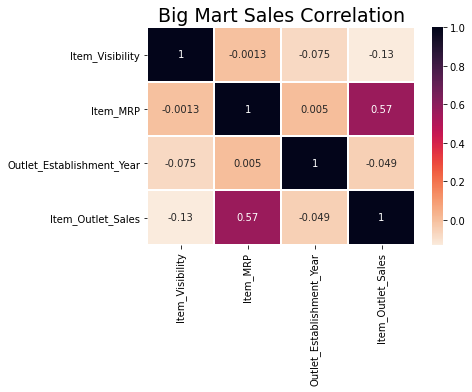

In [12]:
corr = df.corr()
sns.heatmap(corr, cmap = 'rocket_r', linewidth = 1, annot = True)
plt.title('Big Mart Sales Correlation', size = 19);      #this is meant for identifying any correlations in the immediate data

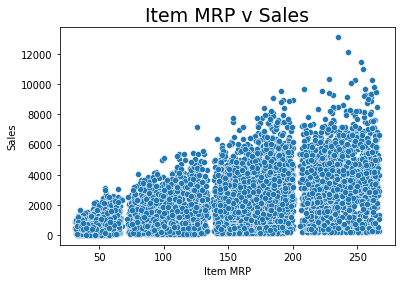

In [13]:
outlet_sales = df['Item_Outlet_Sales']
mrp = df['Item_MRP']

sns.scatterplot(x=mrp, y=outlet_sales)
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.title('Item MRP v Sales', size=19);                       

In [14]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


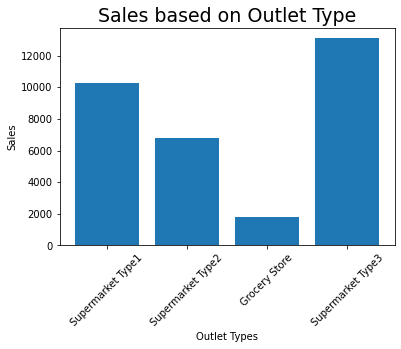

In [15]:
outlet_type = df['Outlet_Type']


plt.bar(outlet_type,outlet_sales)
plt.xticks(rotation=45)
plt.xlabel('Outlet Types')
plt.ylabel('Sales')
plt.title('Sales based on Outlet Type', size=19);

In [16]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


''

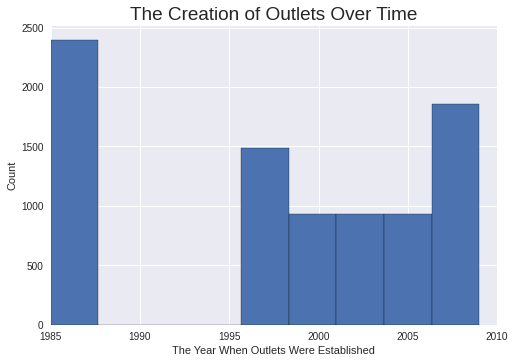

In [17]:
plt.style.use('seaborn')
df['Outlet_Establishment_Year'].hist(bins=9, edgecolor='black')
plt.xticks(rotation = 0)
plt.xlabel('The Year When Outlets Were Established')
plt.ylabel('Count')
plt.xlim(left=1985,right=2010)
plt.title('The Creation of Outlets Over Time', size=19)
;

''

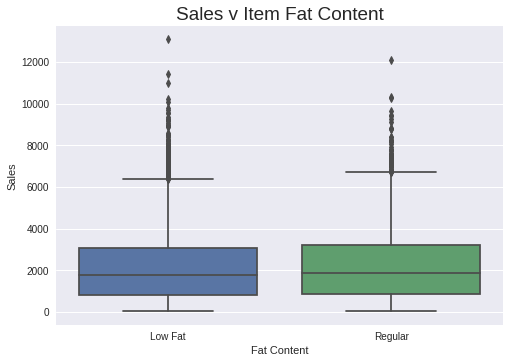

In [23]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19)
;

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


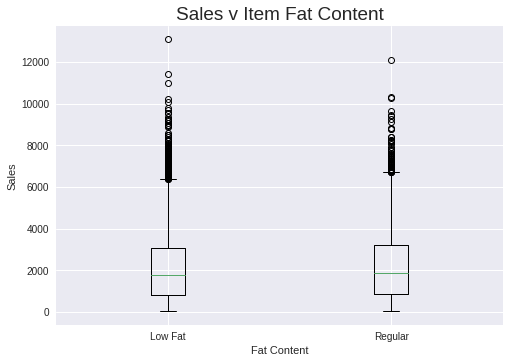

In [19]:
low_fat = df.loc[df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales'].values         #Week 4 Submission 
regular = df.loc[df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales'].values

plt.boxplot([low_fat,regular], labels=['Low Fat','Regular'])
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19);